In [2]:
pip install pandas openpyxl

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
veri = pd.read_excel("C:\\VeriSonSet\\veri_setim.xlsx")  

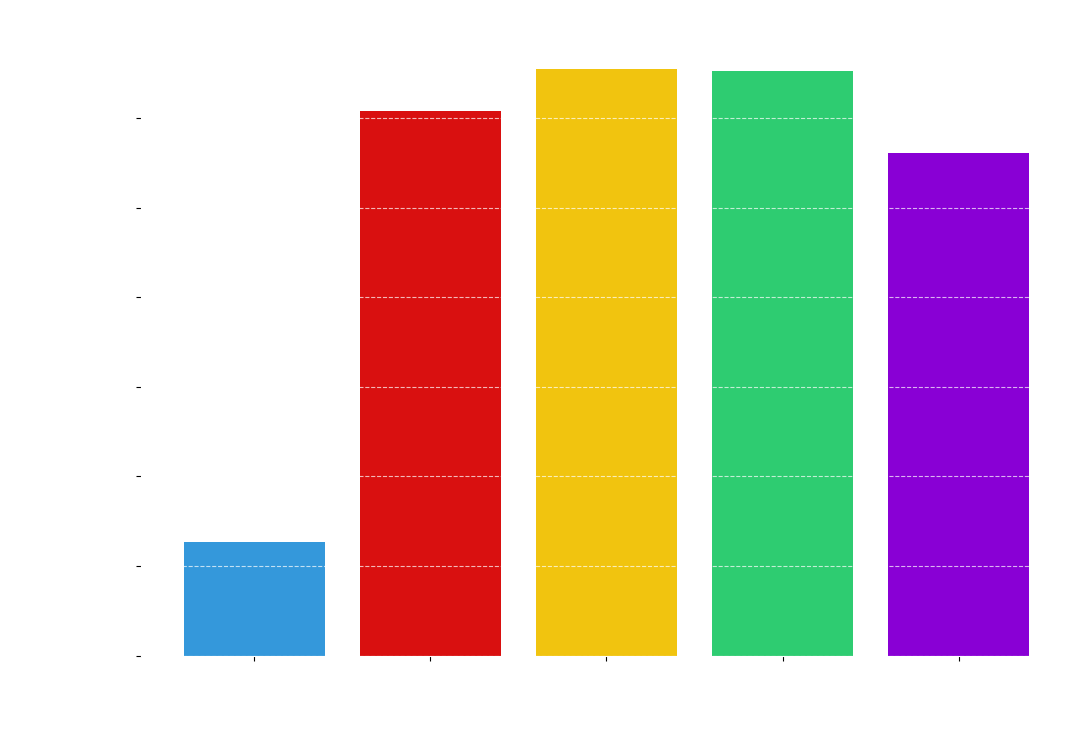

In [6]:
#Bar Grafiği(G20 Bölgelerinin Ortalama Kişi Başına Gelir Karşılaştırması)
regional_gdp = veri.groupby("Bolge")["Kisi_Basina_Gelir"].mean().reset_index()
plt.figure(figsize=(12, 8))
plt.bar(regional_gdp["Bolge"], regional_gdp["Kisi_Basina_Gelir"], 
        color=["#3498db", "#d91010", "#f1c40f", "#2ecc71", "#8900D5"])  

plt.xlabel("Bölge", fontsize=20, color="white", fontweight="bold")
plt.ylabel("Ortalama Kişi Başına Gelir ($)", fontsize=20, color="white", fontweight="bold")
plt.title("G20 Bölgelerinin Ortalama Kişi Başına Gelir Karşılaştırması", fontsize=20, color="white", fontweight="bold")

plt.xticks(rotation=0, fontsize=18, color="white")
plt.yticks(fontsize=20, color="white")

plt.gca().spines["top"].set_color("white")
plt.gca().spines["bottom"].set_color("white")
plt.gca().spines["left"].set_color("white")
plt.gca().spines["right"].set_color("white")

plt.gca().set_facecolor("white")
plt.grid(axis="y", linestyle="--", alpha=0.7, color="white")
plt.show()

C:\Users\edaba\AppData\Local\Temp\ipykernel_8492\3172835115.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\edaba\AppData\Local\Temp\ipykernel_8492\3172835115.py:5: UserWarning: 
The palette list has fewer values (5) than needed (11) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(


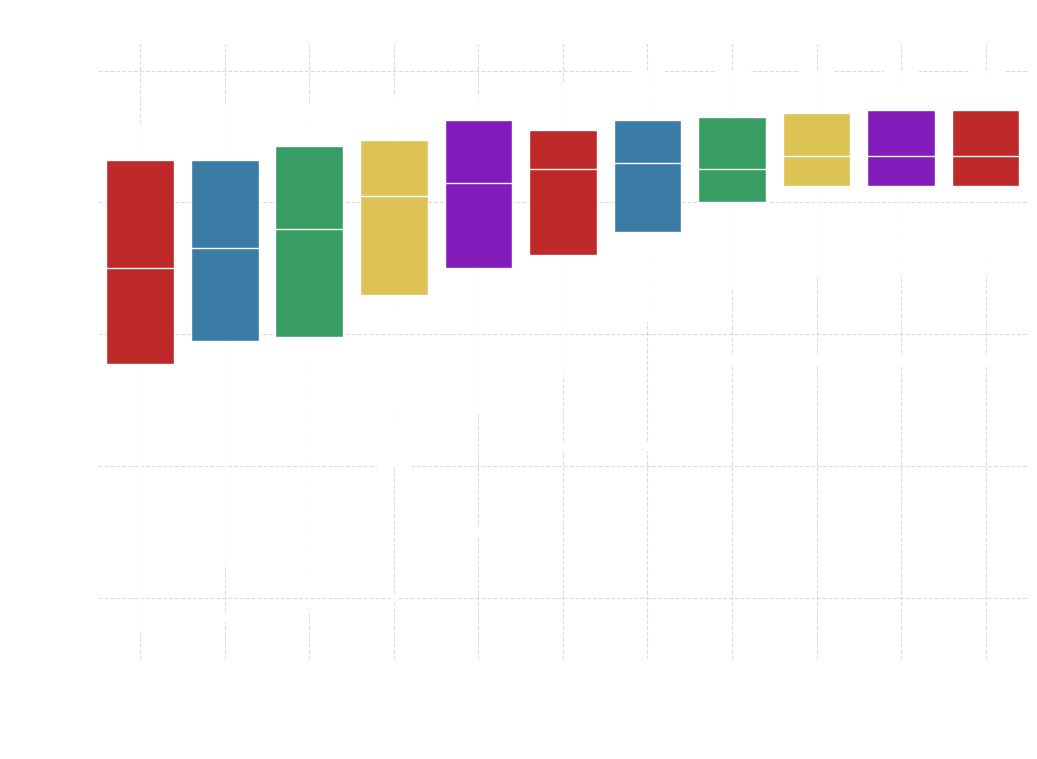

In [7]:
#Kutu Grafiği(Yıllara Göre İnternet Kullanıcı Oranı Dağılımı)
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(12, 8))

sns.boxplot(
    x='Yıl', y='Internet_Kullanici_Orani', data=veri, 
    ax=ax, palette=["#d91010", "#2980B9", "#27AE60", "#F4D03F", "#8900D5"], 
    boxprops={'edgecolor': 'white'},  
    whiskerprops={'color': 'white'},  
    capprops={'color': 'white'},  
    medianprops={'color': 'white'},  
    flierprops={'marker': 'o', 'markerfacecolor': 'white', 'markeredgecolor': 'white'} 
)

ax.set_title('Yıllara Göre İnternet Kullanıcı Oranı Dağılımı', fontsize=20, color="white", fontweight="bold")
ax.set_xlabel('Yıl', fontsize=20, color="white", fontweight="bold")
ax.set_ylabel('İnternet Kullanıcı Oranı (%)', fontsize=20, color="white", fontweight="bold")
ax.tick_params(axis='x', colors="white", labelsize=18) 
ax.tick_params(axis='y', colors="white", labelsize=18)
ax.spines["top"].set_color("white")
ax.spines["bottom"].set_color("white")
ax.spines["left"].set_color("white")
ax.spines["right"].set_color("white")

fig.patch.set_facecolor("white")
ax.set_facecolor("white")

plt.xticks(rotation=45, fontsize=16)  
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


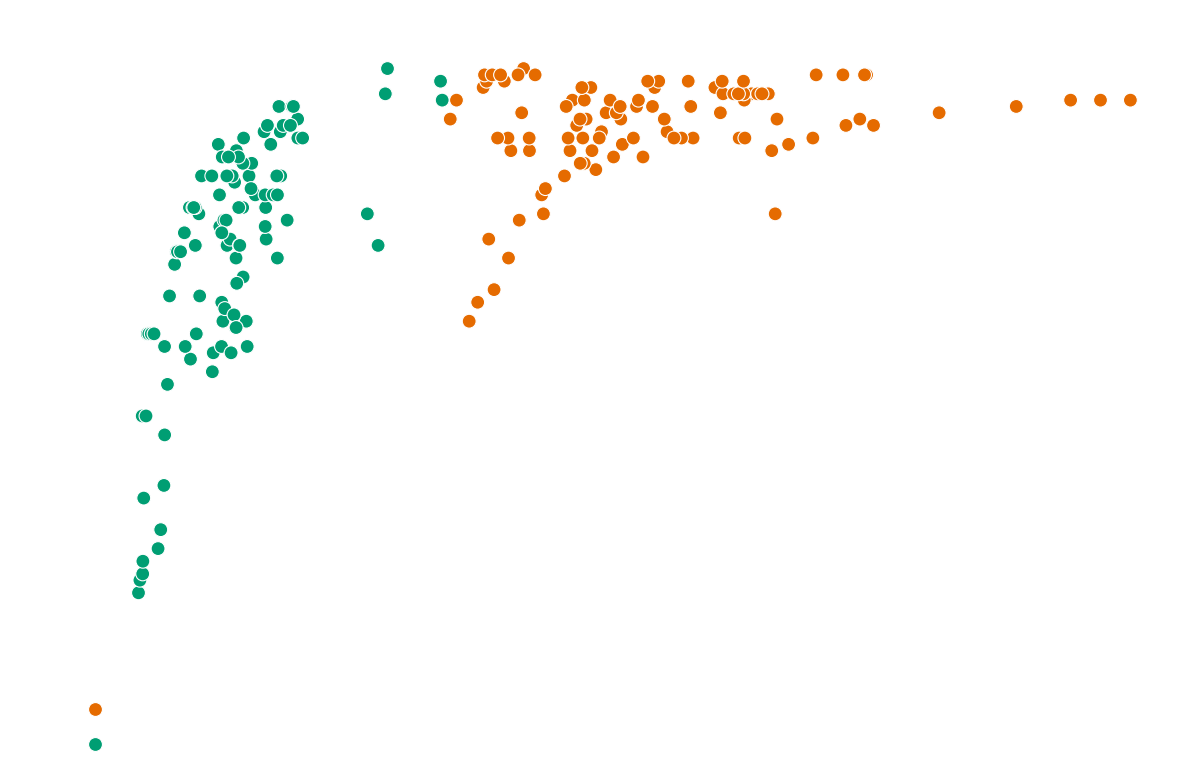

In [8]:
#Saçılım Grafiği(Kişi Başına Gelir ile İnternet Kullanımı Arasındaki İlişki)
veri_filtered = veri[(veri['Kisi_Basina_Gelir'] < 100_000) & 
                 (veri['Internet_Kullanici_Orani'] < 100)]
plt.figure(figsize=(12, 8))
custom_palette = {
    "Gelismekte Olan": "#009E73", 
    "Gelismis": "#E56B00"  
}
sns.scatterplot(
    data=veri_filtered,
    x='Kisi_Basina_Gelir',
    y='Internet_Kullanici_Orani',
    hue='Ekonomik_Kategori',
    palette=custom_palette,  
    s=100,
    alpha= 1
)

plt.xlabel("Kişi Başına Gelir (USD)", fontsize=20, fontweight="bold", color="#FFFFFF")  
plt.ylabel("İnternet Kullanıcı Oranı (%)", fontsize=20, fontweight="bold", color="#FFFFFF")  
plt.title("Kişi Başına Gelir ile İnternet Kullanımı Arasındaki İlişki", fontsize=20, fontweight="bold", color="#FFFFFF") 


plt.grid(linestyle="--", alpha=0.7, color="#FFFFFF", linewidth=1.2)
plt.xticks(fontsize=14, fontweight="bold", color="#FFFFFF") 
plt.yticks(fontsize=14, fontweight="bold", color="#FFFFFF")  

plt.gca().spines["bottom"].set_color("#FFFFFF")
plt.gca().spines["left"].set_color("#FFFFFF")
plt.gca().spines["top"].set_color("#FFFFFF")
plt.gca().spines["right"].set_color("#FFFFFF")

plt.gca().spines["bottom"].set_linewidth(1.5) 
plt.gca().spines["left"].set_linewidth(1.5)
plt.gca().spines["top"].set_linewidth(1.5)
plt.gca().spines["right"].set_linewidth(1.5)

legend = plt.legend(title="Ekonomik Kategori", fontsize=18, frameon=False, loc="lower center", bbox_to_anchor=(0.1, -0.28))
plt.setp(legend.get_texts(), color="#FFFFFF")  
plt.setp(legend.get_title(), color="#FFFFFF", fontsize=20) 

plt.tight_layout()
plt.show()

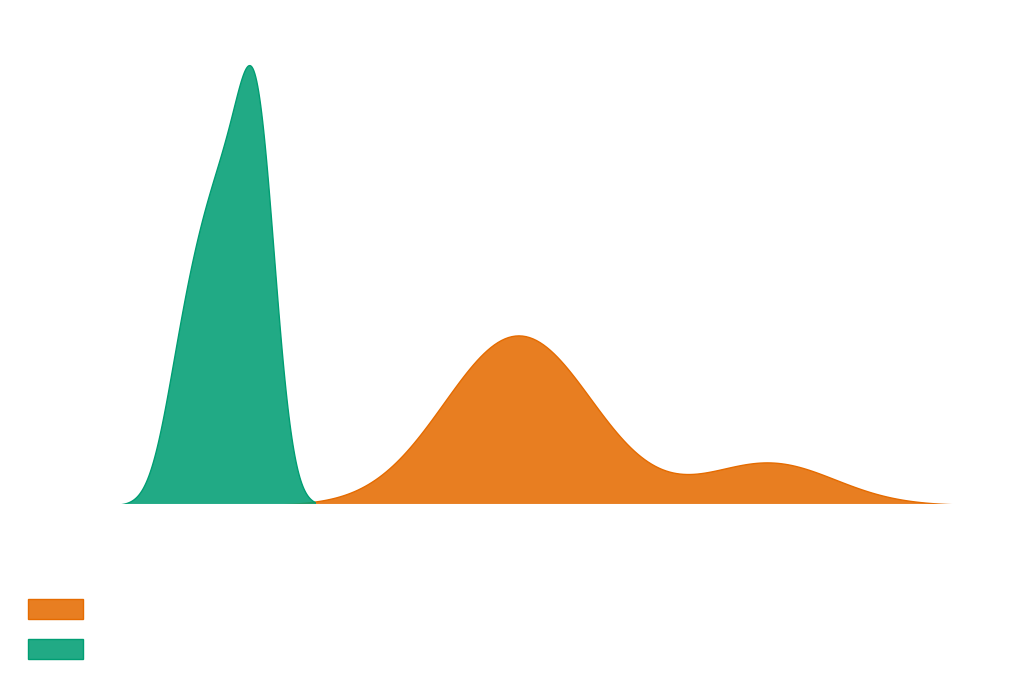

In [10]:
#Yoğunluk Grafiği(Türkiye ve Avrupa Ülkelerinin Ortalama Sıcaklık Verileri)
veri_turkiye = veri[veri["Ulke"] == "Turkiye"]
veri_avrupa = veri[(veri["Ulke"] != "Turkiye") & (veri["Bolge"] == "Avrupa")]

veri_avrupa_avg = veri_avrupa.groupby("Yıl")["Yillik_Ortalama_Sicaklik"].mean().reset_index()
veri_avrupa_avg["Ulke"] = "Avrupa Ortalama"
plt.figure(figsize=(12, 6))

sns.kdeplot(
    data=veri_turkiye,
    x="Yillik_Ortalama_Sicaklik",
    color="#E56B00",  
    fill=True,
    alpha=0.87,
    label="Türkiye"
)
sns.kdeplot(
    data=veri_avrupa_avg,
    x="Yillik_Ortalama_Sicaklik",
    color="#009E73", 
    fill=True,
    alpha=0.87,
    label="Avrupa Ortalama"
)
plt.xlabel("Yıllık Ortalama Sıcaklık (°C)", fontsize=20, fontweight="bold", color="#FFFFFF")
plt.ylabel("Yoğunluk", fontsize=20, fontweight="bold", color="#FFFFFF")
plt.title("Türkiye ve Avrupa Ülkelerinin Ortalama Sıcaklık Dağılımı", fontsize=20, fontweight="bold", color="#FFFFFF")

plt.grid(linestyle="--", alpha=0.7, color="#FFFFFF", linewidth=1.2)
plt.xticks(fontsize=14, fontweight="bold", color="#FFFFFF")
plt.yticks(fontsize=14, fontweight="bold", color="#FFFFFF")

plt.gca().spines["bottom"].set_color("#FFFFFF")
plt.gca().spines["left"].set_color("#FFFFFF")
plt.gca().spines["top"].set_color("#FFFFFF")
plt.gca().spines["right"].set_color("#FFFFFF")

plt.gca().spines["bottom"].set_linewidth(1.5)
plt.gca().spines["left"].set_linewidth(1.5)
plt.gca().spines["top"].set_linewidth(1.5)
plt.gca().spines["right"].set_linewidth(1.5)

legend = plt.legend(title="Bölge", fontsize=20, frameon=False, loc="lower center", bbox_to_anchor=(0.1, -0.4))
plt.setp(legend.get_texts(), color="#FFFFFF", fontsize=20)  
plt.setp(legend.get_title(), color="#FFFFFF", fontsize=20)
plt.show()

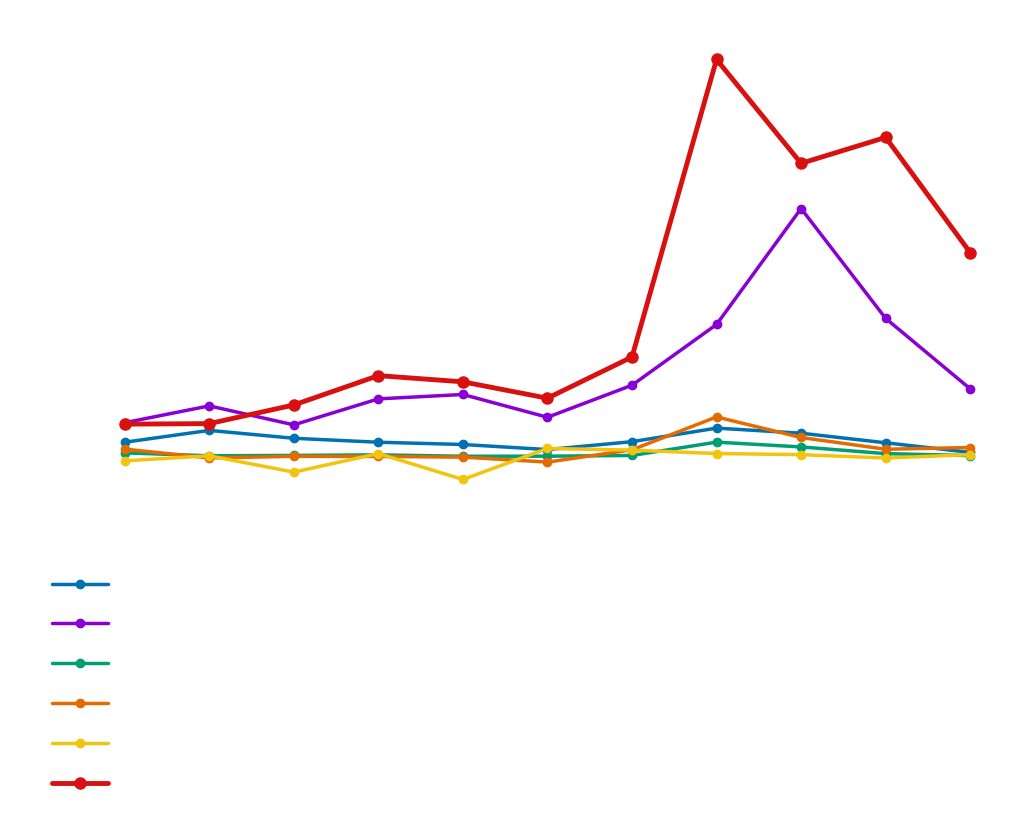

In [11]:
#Çizgi Grafiği(G20 Bölgeleri ve Türkiye - Yıllık Ortalama Enflasyon Oranı Trendleri)
veri.dropna(subset=["Yıl", "Enflasyon_Orani", "Bolge", "Ulke"], inplace=True)
veri_turkiye = veri[veri["Ulke"] == "Turkiye"]

regional_avg = veri[veri["Ulke"] != "Turkiye"].groupby(["Yıl", "Bolge"])["Enflasyon_Orani"].mean().reset_index()
plt.figure(figsize=(12, 6))

colors = {
    "Avrupa": "#E56B00",
    "Asya - Pasifik": "#009E73",
    "Amerika": "#8900D5",
    "Orta Doğu": "#F1C40F",
    "Afrika": "#0072B2",
    "Turkiye": "#d91010" 
}
for region in regional_avg["Bolge"].unique():
    if region in colors:  
        plt.plot(
            regional_avg[regional_avg["Bolge"] == region]["Yıl"],
            regional_avg[regional_avg["Bolge"] == region]["Enflasyon_Orani"],
            label=region,
            color=colors[region],
            linewidth=2.5,
            marker="o"
        )
plt.plot(
    veri_turkiye["Yıl"],
    veri_turkiye["Enflasyon_Orani"],
    label="Türkiye",
    color=colors["Turkiye"],
    linewidth=3.5,  
    linestyle="-",  
    marker="o",
    markersize=8  
)
plt.xlabel("Yıl", fontsize=20, fontweight="bold", color="#FFFFFF")
plt.ylabel("Ortalama Enflasyon Oranı (%)", fontsize=20, fontweight="bold", color="#FFFFFF")
plt.title("G20 Bölgeleri ve Türkiye - Yıllık Ortalama Enflasyon Oranı Trendleri", fontsize=20, fontweight="bold", color="#FFFFFF")

plt.grid(linestyle="--", alpha=0.7, color="#FFFFFF", linewidth=1.2)
plt.xticks(fontsize=20, color="#FFFFFF")
plt.yticks(fontsize=20, color="#FFFFFF")

plt.gca().spines["bottom"].set_color("#FFFFFF")
plt.gca().spines["left"].set_color("#FFFFFF")
plt.gca().spines["top"].set_color("#FFFFFF")
plt.gca().spines["right"].set_color("#FFFFFF")

plt.gca().spines["bottom"].set_linewidth(1.5)
plt.gca().spines["left"].set_linewidth(1.5)
plt.gca().spines["top"].set_linewidth(1.5)
plt.gca().spines["right"].set_linewidth(1.5)

plt.legend(loc="lower center", bbox_to_anchor=(0.1, -0.7), frameon=False, fontsize=20, labelcolor="#FFFFFF")
plt.show()